In [82]:
from glob import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

def fixpath(path):
    if path.startswith("C:"): return "/mnt/c/" + path.replace("\\", "/")[3:]
    else:
        pass
    return path

plt.rc('lines', linewidth=0.75)

output_dir = fixpath(r"C:\Users\smoha\OneDrive - University of Victoria\Project\tasks\linkage_hydro\scen_outputs")

scenarios = pd.DataFrame(glob(f'{output_dir}/*/', recursive=True))
scens = []
for scen in scenarios.iloc[:,0]:
    scens.append(scen.split('/')[-2])
scens = pd.DataFrame(scens)
print(scens)
scenario = scens.iat[int(input("Insert scenario number:\n")),0]
file_name = '_'.join(scenario.split('_')[0:3])

                                   0
0                   BC_Cascade_scen1
1                  BC_cascade_scen10
2     BC_cascade_scen11_basetrans_TK
3   BC_cascade_scen11_expandtrans_SF
4   BC_cascade_scen11_expandtrans_TK
5             BC_cascade_scen11_SA_0
6                  BC_cascade_scen12
7     BC_cascade_scen12_basetrans_TK
8             BC_cascade_scen12_SA_0
9             BC_cascade_scen12_SA_1
10            BC_cascade_scen12_SA_2
11            BC_cascade_scen12_SA_3
12            BC_cascade_scen12_SA_4
13           BC_cascade_scen12_tk_cf
14    BC_cascade_scen13_basetrans_SF
15    BC_cascade_scen13_basetrans_TK
16            BC_cascade_scen13_SA_0
17            BC_cascade_scen13_SA_1
18            BC_cascade_scen13_SA_2
19            BC_cascade_scen13_SA_3
20            BC_cascade_scen13_SA_4
21    BC_cascade_scen14_basetrans_SF
22    BC_cascade_scen14_basetrans_TK
23  BC_cascade_scen14_highertrans_TK
24            BC_cascade_scen14_SA_0
25            BC_cascade_scen14_SA_1
2

In [3]:
#General plot settings

gen_types = {
    'hydro': 'Hydro',
    'Wind': 'Wind',
    'Solar': 'Solar',
    'gasCC': 'Gas CC',
    'gasccs': 'Gas CCS',
    'coalccs': 'Coal CCS',
    'SMR': 'SMR',
    'Nuclear': 'Nuclear',
    'gasSC': 'Gas SC',
    'coal' : 'Coal',
    'diesel': 'Diesel',
    'Biomass': 'Biomass',
    'PHS': 'PHS',
    'LB': 'LB'
}

colors = {
    'hydro': '#a1c5ff',
    'Wind': '#a9d6ae',
    'Solar': '#fcfba9',
    'Wind': '#a9d6ae',
    'gasCC': '#a3a3a3',
    'gasccs': '#a3a3a3',
    'coalccs': '#a3a3a3',
    'SMR': '#a36594',
    'Nuclear': '#664264',
    'gasSC': '#454545',
    'coal' : '#0d0d0d',
    'diesel': '#707070',
    'Biomass': '#a8b3a2',
    'PHS': '#c4fcff',
    'LB': '#b8c3fc'
}

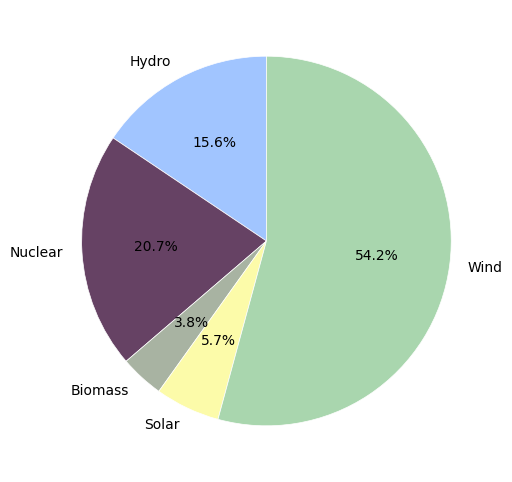

In [4]:
#Pie chart for the total generation
os.chdir(f'{output_dir}/{scenario}')

total_generation = pd.read_excel(f'analysis_{file_name}.xlsx',sheet_name='Total Dispatch' , index_col=0)
yearly_total_generation = total_generation.loc['total']
if 'cascade' in yearly_total_generation.index:
        yearly_total_generation.hydro = yearly_total_generation.hydro + yearly_total_generation.cascade
        yearly_total_generation = yearly_total_generation.drop('cascade')
if 'Dummy' in yearly_total_generation.index:
        yearly_total_generation = yearly_total_generation.drop('Dummy')
if 'storage' in yearly_total_generation.index:
        yearly_total_generation = yearly_total_generation.drop('storage')
if 'import' in yearly_total_generation.index:
        yearly_total_generation = yearly_total_generation.drop('import')


curt = pd.read_excel(f'analysis_{file_name}.xlsx',sheet_name='Curtailment Details' , index_col=0)
curtwind = curt['Total Curtailed Wind'].sum()
#yearly_total_generation['Curteiled']

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, pcts = ax.pie(yearly_total_generation, labels=[gen_types[key] for key in list(yearly_total_generation.index)], autopct='%1.1f%%', 
        startangle=90, colors=[colors[keyc] for keyc in list(yearly_total_generation.index)])
plt.setp(wedges, linewidth=0.5, edgecolor='white')
plt.setp(pcts, size=10)

plt.savefig(f'{scenario.split(".")[0]}_total_generation.png', dpi=300, bbox_inches='tight')
plt.show()

2050-01-01 00:00:00     29946.000000
2050-01-01 01:00:00     30379.500000
2050-01-01 02:00:00     29805.000000
2050-01-01 03:00:00     29017.500000
2050-01-01 04:00:00     28279.500000
                            ...     
2050-03-01 21:00:00     27920.887522
2050-03-01 22:00:00     27630.572075
2050-03-01 23:00:00     27452.164757
curtailed percentage             NaN
total                            NaN
Length: 1442, dtype: float64


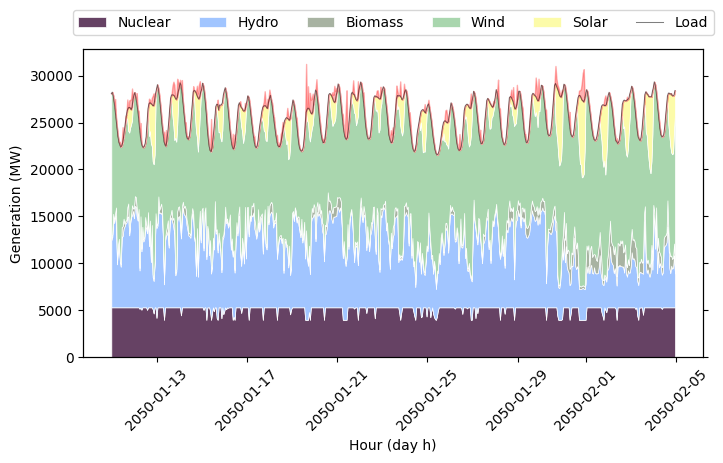

In [83]:
#Stacked area chart for hourly dispatch
from datetime import datetime

os.chdir(f'{output_dir}/{scenario}')


hourly_dispatch = pd.read_excel(f'analysis_{file_name}.xlsx',sheet_name='Total Dispatch' , index_col=0)
hourly_dispatch = hourly_dispatch.drop('total', axis=0)

load_curve = pd.read_excel(fixpath(fr"C:\SILVER_BC_Cascade\SILVER_Data\user_inputs\BC_Cascade_Demand_Real_Forecasted_{file_name.split('_')[-1]}.xlsx"), sheet_name='Province_Total_Real', index_col=0)
load_curve = load_curve.loc[:,'demand']
load_curve = load_curve.iloc[0:len(hourly_dispatch)]
load_curve.index = hourly_dispatch.index
load_curve = load_curve
curt = pd.read_excel(f'analysis_{file_name}.xlsx',sheet_name='Curtailment Details' , index_col=0)
curtwind = curt['Total Curtailed VRE']
curtwind = curtwind + load_curve
print(curtwind)

if 'cascade' in hourly_dispatch.columns:
    hourly_dispatch.hydro = hourly_dispatch.hydro + hourly_dispatch.cascade
    hourly_dispatch = hourly_dispatch.drop('cascade', axis=1)
if 'Dummy' in hourly_dispatch.columns:
        hourly_dispatch = hourly_dispatch.drop('Dummy', axis=1)
if 'storage' in hourly_dispatch.columns:
        hourly_dispatch = hourly_dispatch.drop('storage', axis=1)
if 'import' in hourly_dispatch.columns:
        hourly_dispatch = hourly_dispatch.drop('import', axis=1)

hourly_dispatch['Wind'] = hourly_dispatch['Wind'] + load_curve - hourly_dispatch.sum(axis=1)

if 'Nuclear' in hourly_dispatch.columns:
        cols = ['Nuclear', 'hydro', 'Biomass', 'Wind', 'Solar']
        hourly_dispatch = hourly_dispatch[cols]

starthour = 240
endhour = 600
hourly_dispatch = hourly_dispatch.iloc[starthour:starthour+endhour]
load_curve = load_curve.iloc[starthour:starthour+endhour]
curtwind = curtwind.iloc[starthour:starthour+endhour]


fig, ax = plt.subplots(figsize=(8,4))
lns1 = ax.stackplot(hourly_dispatch.index, hourly_dispatch.values.T, labels=[gen_types[key] for key in list(hourly_dispatch.columns)], colors=[colors[keyc] for keyc in list(hourly_dispatch.columns)]
             , baseline='zero', lw=0.5, edgecolor='white')
ax.set(xlabel='Hour (day h)', ylabel='Generation (MW)')
ax.set(ylim=(0, curtwind.max()*1.05))
ax.tick_params(axis='x', rotation=45)
ax2 = ax.twinx()
lns2 = ax2.plot(load_curve, color='black', label='Load', alpha=0.5)
ax2.set(yticklabels=[])
ax2.set(ylim=(0, ax.get_ylim()[1]))
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.15))
#ax2.legend(loc='lower right', bbox_to_anchor=(.973, 0.36))
plt.plot(curtwind, color='red', label='Curtailment', alpha=0.0)
plt.fill_between(curtwind.index, curtwind, load_curve,  color='red', alpha=0.3)


plt.savefig(f'{scenario.split(".")[0]}_hourly_dispatch.jpg', dpi=300, bbox_inches='tight')
plt.show()

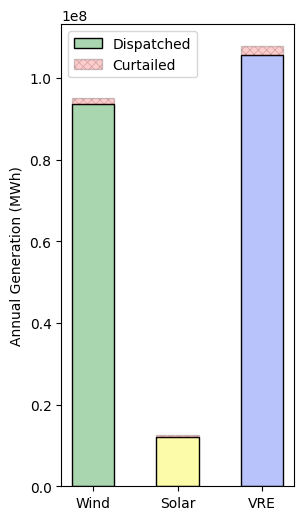

In [84]:
# Chart for total dispatched and curtailed wind and solar

import matplotlib as mpl

mpl.rcParams['hatch.linewidth'] = 0.5

os.chdir(f'{output_dir}/{scenario}')

plt.subplots(figsize=(3,6))
curt_details = pd.read_excel(f'analysis_{file_name}.xlsx',sheet_name='Curtailment Details' , index_col=0)
curt_details = 6*curt_details.iloc[0:1440,-9:].sum()
x= ['Wind', 'Solar', 'VRE']
y1, y2 = [curt_details[1], curt_details[4], curt_details[7]], [curt_details[2], curt_details[5], curt_details[8]]

barlist1 = plt.bar(x, y1, color=[colors['Wind'], colors['Solar'], colors['LB']], 
                   edgecolor='black', label='Dispatched', width=0.5)
barlist2 = plt.bar(x, y2, bottom=y1, color='red', alpha = 0.2, 
                   edgecolor='black', hatch = 'xxxx',label='Curtailed', width=0.5)
#plt.ylim(0, 1.1*(y1+y2))

plt.ylabel('Annual Generation (MWh)')
plt.legend(loc='upper left')

plt.savefig(f'{scenario.split(".")[0]}_curtailment.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
vom_prices = {
    'Nuclear': 0.97125,
    'hydro': 3.56,
    'Biomass': 5.06,
    'Wind': 0.00001,
    'Solar': 0.00001,
}

In [16]:
# Reading caps

caps = pd.read_csv(fixpath(r'C:\Users\smoha\OneDrive - University of Victoria\Project\tasks\linkage_hydro\base_COPPER_output\caps.csv'), index_col=0)


In [85]:
# Comparing scenarios

scenarios = pd.DataFrame(glob(f'{output_dir}/*/', recursive=True))
scenarios.sort_values(by=0, inplace=True)
scens = []
for scen in scenarios.iloc[:,0]:
    scens.append(scen.split('/')[-2])
scens = pd.DataFrame(scens)
print(scens)
scenarios = input('Enter scenarios to compare (separated by commas): ')
scenarios = scenarios.split(',')
scenarios = list(map(int, scenarios))

scn_db = pd.read_excel(f'{os.path.dirname(output_dir)}/scenarios_db.xlsx', sheet_name='scen', index_col=0)
scn_db = scn_db.loc[:, ['demand','trans constraint']]

var_costs_compare = pd.DataFrame()
fixed_cost_compare = pd.DataFrame()
price_compare = pd.DataFrame()
uc_compare = pd.DataFrame()
lf_compaer = pd.DataFrame()
scn_db_add = pd.DataFrame()
curt_det = pd.DataFrame()

for index, row in scens.iloc[scenarios].iterrows():
    file_name = '_'.join(row[0].split('_')[0:3])
    uc_results = pd.read_excel(f'{output_dir}/{row[0]}/analysis_{file_name}.xlsx',sheet_name='Total Dispatch' , index_col=0)
    uc_results = uc_results.loc['total']
    
    scen_no = row[0].split('_')[2]
    total_caps = caps.loc[scen_no, :].sum()
    fixed_cost = round(total_caps['biomass'] * 0.154436 +\
                    total_caps['wind'] * 0.32000 +\
                    total_caps['solar'] * 0.12000 +\
                    total_caps['nuclear'] * 0.130000 +\
                    total_caps['hydro'] * 0.19000 +\
                    total_caps['SMR'] * 0.190000, 2)
    
    curt_details = pd.read_excel(f'{output_dir}/{row[0]}/analysis_{file_name}.xlsx',sheet_name='Curtailment Details' , index_col=0)
    curt_details = 6*curt_details.iloc[0:1440,-9:].sum()
    curt_det.loc[row[0], ['Dispatched Wind', 'Curtailed Wind', 'Curtailed_Wind (%)']] = [round(6*curt_details[1],2), round(6*curt_details[2],2), round(100*curt_details[2]/curt_details[0], 2)]
    curt_det.loc[row[0], ['Dispatched Solar', 'Curtailed Solar', 'Curtailed_Solar (%)']] = [round(6*curt_details[4],2), round(6*curt_details[5],2), round(100*curt_details[5]/curt_details[3], 2)]
    curt_det.loc[row[0], ['Dispatched VRE', 'Curtailed VRE', 'Curtailed_VRE (%)']] = [round(6*curt_details[7],2), round(6*curt_details[8],2), round(100*curt_details[8]/curt_details[6], 2)]
    
    var_cost = 6*round((uc_results.get('Biomass', default=0)*vom_prices['Biomass'] +\
                    uc_results['Wind']*vom_prices['Wind'] +\
                    uc_results['Solar']*vom_prices['Solar'] +\
                    uc_results['hydro']*vom_prices['hydro'] +\
                    uc_results.get('Nuclear', default=0)*vom_prices['Nuclear']) , 2)
    
    uc_compare.loc[row[0],['Biomass (MWh/y)','Wind (MWh/y)','Solar (MWh/y)','Hydro (MWh/y)','Nuclear(MWh/y)']]= \
        [6*uc_results.get('Biomass', default=0),
         6*uc_results['Wind'],6*uc_results['Solar'],
         6*uc_results['hydro'],6*uc_results.get('Nuclear', default=0)]
    
    lineflow = pd.read_excel(f'{output_dir}/{row[0]}/analysis_{file_name}.xlsx',sheet_name='Line Flow' , index_col=0)
    lf_compaer.loc[row[0], 'Total Line Flow'] = 6*lineflow.iloc[2:,13].abs().sum()
    
    var_costs_compare.loc[row[0], 'Variable Cost'] = var_cost
    fixed_cost_compare.loc[row[0], 'Fixed Cost'] = fixed_cost

    scn_db_add.loc[row[0], ['demand', 'trans constraint']] = scn_db.loc[scen_no, ['demand', 'trans constraint']]

    #total_load = pd.read_excel(f'{output_dir}/{row[0]}/analysis_{file_name}.xlsx',sheet_name='Analysis' , index_col=0)
    #total_load = total_load.at['total', 'Load']
    elec_price = round((fixed_cost+var_cost)/uc_compare.sum(axis=1)[0], 2)
    price_compare.loc[row[0], 'Price'] = elec_price


oper_cost_compare = pd.concat([scn_db_add, var_costs_compare, fixed_cost_compare, price_compare, uc_compare, curt_det, lf_compaer], axis=1)
naming = input("Analysis scenario and iteration?")
oper_cost_compare.to_excel(f"{output_dir}/comparison_{naming}.xlsx")

                                   0
0                   BC_Cascade_scen1
1                   BC_Cascade_scen2
2                   BC_Cascade_scen3
3                   BC_Cascade_scen4
4                   BC_Cascade_scen5
5                  BC_cascade_scen10
6             BC_cascade_scen11_SA_0
7             BC_cascade_scen11_SA_1
8             BC_cascade_scen11_SA_2
9             BC_cascade_scen11_SA_3
10            BC_cascade_scen11_SA_4
11    BC_cascade_scen11_basetrans_TK
12  BC_cascade_scen11_expandtrans_SF
13  BC_cascade_scen11_expandtrans_TK
14                 BC_cascade_scen12
15            BC_cascade_scen12_SA_0
16            BC_cascade_scen12_SA_1
17            BC_cascade_scen12_SA_2
18            BC_cascade_scen12_SA_3
19            BC_cascade_scen12_SA_4
20    BC_cascade_scen12_basetrans_TK
21           BC_cascade_scen12_tk_cf
22            BC_cascade_scen13_SA_0
23            BC_cascade_scen13_SA_1
24            BC_cascade_scen13_SA_2
25            BC_cascade_scen13_SA_3
2

/home/smoha/.virtualenvs/etl-env/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


/home/smoha/.virtualenvs/etl-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


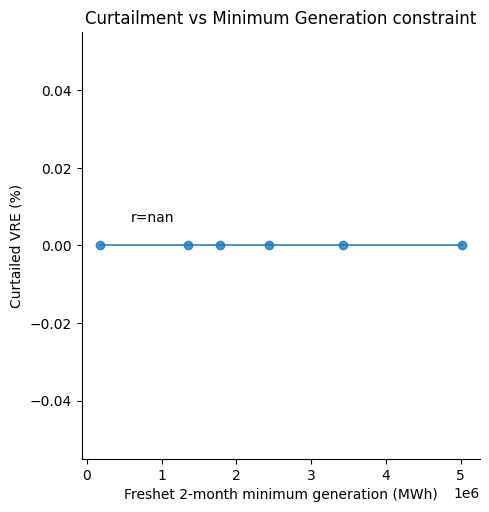

In [94]:
# SA correlation calcs
from scipy import stats
import seaborn as sns

naming = input("Analysis scenario and iteration?")
sa_analysis = pd.read_excel(f'{output_dir}/comparison_{naming}.xlsx', index_col=0)
r, p = stats.pearsonr(sa_analysis['total_pmins'], sa_analysis['Curtailed_VRE (%)'])
sns.lmplot(x='total_pmins', y='Curtailed_VRE (%)', data=sa_analysis)
plt.text(0.05, 0.8, 'r={:.2f}'.format(r), transform=ax.transAxes)
plt.title('Curtailment vs Minimum Generation constraint')
plt.xlabel('Freshet 2-month minimum generation (MWh)')
plt.ylabel('Curtailed VRE (%)')

plt.savefig(f'{output_dir}/curt_pmin_corr_{naming}.jpg', dpi=300, bbox_inches='tight')